# The results for the propeller case

In [25]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from lifting_line_singular import lifting_line_model_singular
from lifting_line_general import lifting_line_model
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
import time
from matplotlib.gridspec import GridSpec
from bokeh.layouts import gridplot
from bokeh.plotting import figure, output_file, show, output_notebook

# Singular rotor with airfoil polars

In [26]:
#turbine parameters
R = 0.7 
N_blades = 6
mu_start = 0.25
mu_end = 1
U_0 = 60

N_blade_sec = 20       #number of blade sections
N_wake_sec_rot = 30    #number of wake sections per rotation of the rotor
N_rot = int(10)              #the number of rotations of the rotor NOTE needs to be integer
a_w = 0.25             #the assumed wake convection induction factor U_wake = U_0*(1-a_w)
#TSR = 10              # TSR for turbine case        
n = 1200               # RPM
Omega = n*2*np.pi/60
TSR = Omega*R/U_0 # tip speed ratio

airfoil = 'ARA_polar.txt' #DU_polar.txt or ARA_polar.txt


## Sensitivity Analysis w.r.t. discretization

#### Evaluate turbine 

In [34]:

#turbine parameters
R = 50
N_blades = 3
mu_start = 0.2
mu_end = 1
U_0 = 10

N_blade_sec = 50      #number of blade sections
N_wake_sec_rot = 30    #number of wake sections per rotation of the rotor
N_rot = 16              #the number of rotations of the rotor NOTE needs to be integer
a_w = 0.2735869           #the assumed wake convection induction factor U_wake = U_0*(1-a_w)
TSR = 8
Omega = TSR*U_0/R
core_size=0.05

airfoil = 'DU_polar.txt' #DU_polar.txt or ARA_polar.txt

mu_vec = np.array([0.2,1.0])   #vector where chord and twist are known. NOTE beginpoint needs to be mu_start and end point mu_end
#chord_vec = np.array([2.452,0.50])  #chord values at above locations in m
#twist_vec = np.array([4.044,-5.22]) #twist values at above locations in degrees
chord_vec = np.array([3.726266186,0.7697521700000003]) 
twist_vec = np.array([7.719046267376299,-4.7470321246237])


spacing = 'cosine'  #spacing method to use, choose from 'cosine' or 'uniform'


Initializing
Setting up blade geometry
Constructing blade number 0
Constructing blade number 1
Constructing blade number 2
Setting up wake induction matrices
Evaluating the effect of the vorticity from blade 0 on blade 0
Evaluating the effect of the vorticity from blade 1 on blade 0
Evaluating the effect of the vorticity from blade 2 on blade 0
Solving problem using lift and drag polar data
Converged within iteration limit!
CT = 0.7499386430560657
CP = 0.48153206534219933
[ 3.37452205  3.57534073  5.21117695  6.65916817  7.75867596  8.4914589
  8.72895037 17.22515623  8.930066   14.63946444  9.19509684  9.21885282
  8.99144592  8.67670625  8.37331554  8.07757254  7.80755916  7.56700765
  7.36108514  7.1912696   7.06296434  6.97036465  6.91266744  6.88834727
  6.89546142  6.93181039  6.99501242  7.08250959  7.19148497  7.32302562
  7.47094927  7.63251764  7.80573973  7.98707887  8.17149733  8.36134375
  8.54700991  8.71946541  8.89184122  9.03465692  9.13691194  9.18289857
  9.14884028 

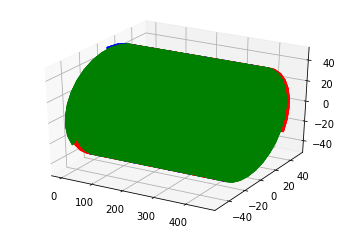

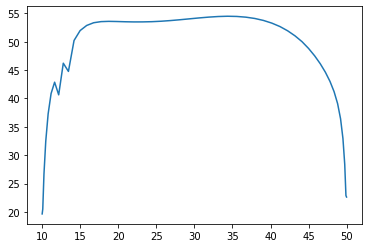

In [35]:

#intialize the class
L = lifting_line_model_singular(R, N_blades, mu_start, mu_end, mu_vec, chord_vec, twist_vec, U_0, TSR, N_blade_sec, N_wake_sec_rot, N_rot, a_w, airfoil, spacing = spacing)
#change an attribute of the class, in this case the update weight, if you're happy with standard value, this line can be skipped
L.weight_step = 0.05
L.core_size=core_size
#L.print_progress = False
#commit all the inputs
L.commit_parameters()

#plot the wake of the rotor
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

colors = ['b','r','g']

for j in range(N_blades):
    ax.plot(L.blades[j].x_cp,L.blades[j].y_cp,L.blades[j].z_cp)
    for i in range(N_blade_sec+1):
        ax.plot(L.blades[j].x_wake[i,:],L.blades[j].y_wake[i,:],L.blades[j].z_wake[i,:], colors[j])

L.solve_system()

print(L.blades[0].alpha)

plt.figure()
plt.plot(L.blades[0].R_cent,L.blades[0].gamma_bound)

# Wake convection speed

Converged within iteration limit!
CT = 0.7499407043734684
CP = 0.4815353389997248
true diff = 7.906708648540042e-05, difference = 7.906708648540042e-05, a_w_new = 0.2735769641266
Converged within iteration limit!
CT = 0.7499615908614367
CP = 0.48156851160602804
true diff = 5.1214807573313426e-05, difference = 5.1214807573313426e-05, a_w_new = 0.27347626610663156
Converged within iteration limit!
CT = 0.7499750526519902
CP = 0.4815899410853778
true diff = 3.326423715245477e-05, difference = 3.326423715245477e-05, a_w_new = 0.2734110452647137
Converged within iteration limit!
CT = 0.7499838349946691
CP = 0.4816038907657289
true diff = 2.1553804997642643e-05, difference = 2.1553804997642643e-05, a_w_new = 0.2733686862177115
Converged within iteration limit!
CT = 0.7499895245307076
CP = 0.4816129282949852
true diff = 1.3967487477912258e-05, difference = 1.3967487477912258e-05, a_w_new = 0.2733412402773586
Converged within iteration limit!
CT = 0.7499932112124545
CP = 0.4816187844624555
tru

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript back

Converged within iteration limit!
CT = 0.5818381098286824
CP = 0.25025629709158337
For a_w=0.7, execution time = 90.7704s
[2.70575216 2.85180754 4.20295746 5.42475045 6.31424583 6.85732991
 7.10323457 7.11318915 6.95792496 6.70420164 6.40511415 6.09581027
 5.79496802 5.51749168 5.26859776 5.05068417 4.86473308 4.71092548
 4.58906803 4.49864675 4.43890365 4.40889313 4.4075265  4.43360532
 4.48584393 4.56288204 4.66328892 4.78556086 4.92811314 5.08926663
 5.26729692 5.4602764  5.66617875 5.88288702 6.10826507 6.33786813
 6.57038534 6.80303977 7.03151588 7.25146388 7.45615616 7.62580941
 7.73683673 7.75246351 7.62069148 7.27272142 6.63824387 5.61324521
 4.20333053 4.18732408]


The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript back

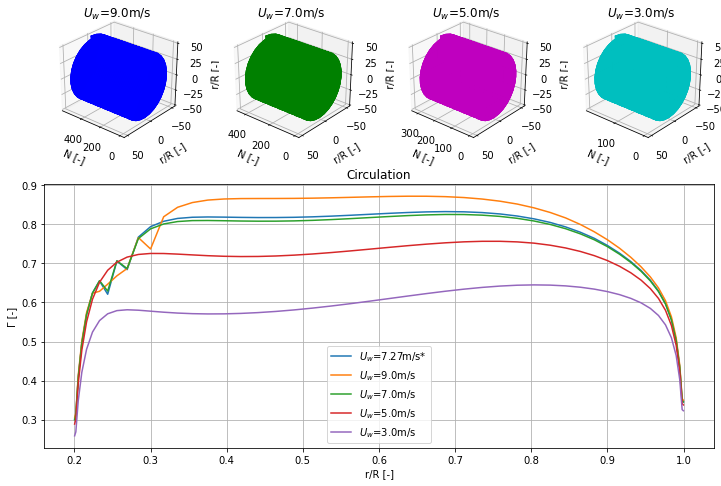

In [15]:
# Create figure list
fig = plt.figure(figsize=(12,8))


colors = ['b', 'g', 'm', 'c', 'r']
single_line_plot = False

a_w_list = [0.1, 0.3, 0.5, 0.7]

gs = GridSpec(2, len(a_w_list), height_ratios=[1, 2], figure=fig)
ax1 = fig.add_subplot(gs[1, :])
L.print_progress = False
# Loop for finding the real induction factor
convergence_limit = 0.00001
true_CT = 0.75
con_speed = 0.75 # level of calculated induction factor is included in the new induction factor
diff = 1
count = 0
step_size = 0.1
L.a_w = 0.273323

while diff > convergence_limit:
    if count >0:
        a_w_new = (1-diff)*L.a_w - true_diff
        L.a_w = a_w_new
    L.commit_parameters()
    L.solve_system()
    # check for convergence
    true_diff = (true_CT - L.CT_polar)/L.CT_polar
    diff = abs(true_diff)
    
    print("true diff = {}, difference = {}, a_w_new = {}".format(true_diff, diff, L.a_w))
#     print()
    count += 1

    if count > 50:
        print('exceeded iteration limit')
        break
    elif diff <= convergence_limit:
        print('found true value!')
        
x = L.blades[0].R_cent/L.blades[0].R
ax1.plot(x, L.blades[0].gamma_bound*L.N_blades/(U_0**2*np.pi/Omega), label="$U_{w}$"+"="+str(round(L.U_wake,2))+"m/s*")

for k, a_w in enumerate(a_w_list):
    # set parameters
    L.a_w = a_w
    
    t_start = time.time() 
    L.commit_parameters()
    # plots wakes
    ax = fig.add_subplot(gs[0, k], projection='3d')
    for j in range(1):
        ax.plot(L.blades[j].x_cp,L.blades[j].y_cp,L.blades[j].z_cp, color=colors[k])
        for i in range(L.N_blade_sec+1):
            #print("j= {}, i={}".format(j,i))
            ax.plot(L.blades[j].x_wake[i,:],
                    L.blades[j].y_wake[i,:],
                    L.blades[j].z_wake[i,:], 
                    colors[k], linewidth=1)
    # solve system
    L.solve_system()
    t_end = time.time()
    time_diff = round(t_end - t_start, 4)
    print("For a_w={}, execution time = {}s".format(a_w, time_diff))

    x = L.blades[0].R_cent/L.blades[0].R
    ax1.plot(x, L.blades[0].gamma_bound*L.N_blades/(U_0**2*np.pi/Omega), label="$U_{w}$"+"="+str(round(L.U_wake,2))+"m/s")

#     x = L.blades[0].R_cent/L.blades[0].R
#     ax1.plot(L.blades[0].R_cent/L.blades[0].R, -L.blades[0].cp_induction_u/U_0, label=str(a_w), color=colors[k])
#     ax1.scatter(x, L.blades[0].gamma_bound*L.N_blades/(U_0**2*np.pi/Omega), s=25)
    
    print(L.blades[0].alpha)
    ax.view_init(30, -50-180)
    ax.set_ylabel('r/R [-]')
    ax.set_zlabel('r/R [-]')
    ax.set_xlabel('N [-]')
    ax.set_title("$U_{w}$" +'={value}m/s'.format(value =round(L.U_wake, 2)))


# Make it pretty
ax1.set_title('Circulation')
ax1.grid(True)
ax1.set_xlabel('r/R [-]')
ax1.set_ylabel('\u0393 [-]')
# ax1.set_ylim(bottom=0)
ax1.legend()
fig.savefig("sensitivity_analysis/turb_sensitivity_convection_speed.eps")


## Cosine/Uniform

In [ ]:
fig1, ax2 = plt.subplots(1,1, figsize=(10,5))
# fig2, ax2 = plt.subplots(1,1, figsize=(10,8))
trans = 0.8 # translucency
colors = ['b', 'g', 'm', 'c', 'r']
# Base parameters
L.spacing = 'cosine'
L.R = 50
L.N_blades = 3
L.mu_start = 0.2
L.mu_end = 1
L.U_0 = 10

N_blade_sec = 20       #number of blade sections
N_wake_sec_rot = 30    #number of wake sections per rotation of the rotor
N_rot = 5              #the number of rotations of the rotor NOTE needs to be integer
a_w = 0.2835247352080  #the assumed wake convection induction factor U_wake = U_0*(1-a_w)
TSR = 8
Omega = TSR*U_0/R


t_start = time.time()
L.spacing='uniform'
L.N_blade_sec = 50
L.commit_parameters()
L.solve_system()
t_end = time.time()
time_diff = round(t_end - t_start, 4)
print("number of blade sections = {}".format(L.N_blade_sec))
print("For type={}, execution time = {}s".format(L.spacing, time_diff))

x1 = L.blades[0].R_dist/L.blades[0].R
x2 = L.blades[0].R_cent/L.blades[0].R
# ax1.plot(x1, L.blades[0].c_dist, label='Real', color='m')
ax2.plot(x2, L.blades[0].gamma_bound*L.N_blades/(U_0**2*np.pi/Omega), label='Real', alpha=trans, color='m')

# uniform spacing plot
# number of blade sections = 20
L.N_blade_sec = 20
spacings = ['cosine', 'uniform']
for spacing in spacings:
    # set parameters
    L.spacing = spacing
    t_start = time.time()
    L.commit_parameters()
    # solve system
    L.solve_system()
    t_end = time.time()
    time_diff = round(t_end - t_start, 4)
    print("For type={}, execution time = {}s".format(L.spacing, time_diff))
    # plot results
    x1 = L.blades[0].R_dist/L.blades[0].R
    x2 = L.blades[0].R_cent/L.blades[0].R
#     ax1.plot(x1, L.blades[0].c_dist, label=spacing)
#     ax1.scatter(x1, L.blades[0].c_dist, s=25)
    ax2.plot(x2, L.blades[0].gamma_bound*L.N_blades/(U_0**2*np.pi/Omega), label=spacing, alpha=trans)
#     ax2.scatter(x2, L.blades[0].gamma_bound*L.N_blades/(U_0**2*np.pi/Omega), s=25)

ax2.set_title('Circulation')
ax2.grid(True)
ax2.set_xlabel('r/R [-]')
ax2.set_ylabel('\u0393 [-]')
ax2.set_ylim(bottom=0)
ax2.legend()

# saving figures
fig1.savefig('sensitivity_analysis/turb_sensitivity_type.eps')
# fig2.savefig('prop_img/prop_sensitivity_cosine_circulation.eps')


## Azimuthal discretization (number of blade segments)

Initializing
Setting up blade geometry
Constructing blade number 0
Constructing blade number 1
Constructing blade number 2
Setting up wake induction matrices
Evaluating the effect of the vorticity from blade 0 on blade 0
Evaluating the effect of the vorticity from blade 1 on blade 0
Evaluating the effect of the vorticity from blade 2 on blade 0
Solving problem using lift and drag polar data
Converged within iteration limit!
CT = 0.7603246555042369
CP = 0.4989870976818131
Initializing
Setting up blade geometry
Constructing blade number 0
Constructing blade number 1
Constructing blade number 2
Setting up wake induction matrices
Evaluating the effect of the vorticity from blade 0 on blade 0
Evaluating the effect of the vorticity from blade 1 on blade 0
Evaluating the effect of the vorticity from blade 2 on blade 0
Solving problem using lift and drag polar data
Converged within iteration limit!
CT = 0.7603246555042369
CP = 0.4989870976818131
Initializing
Setting up blade geometry
Construct

KeyboardInterrupt: 

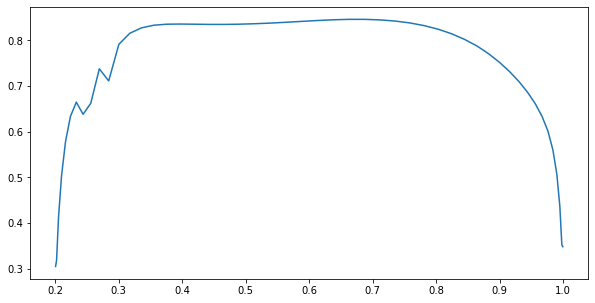

In [31]:

fig1, ax2 = plt.subplots(1,1, figsize=(10,5))
#fig2, ax2 = plt.subplots(1,1, figsize=(10,8))
trans = 0.8 # translucency

# cosine spacing
# number of blade sections = 10
N_blade_sections = [50, 20, 10, 5]

for N in N_blade_sections:
    # set parameters
    execution_time = 0
    for i in range(10):
        t_start = time.time()
        L.N_blade_sec = N
        L.commit_parameters()
        #solve system
    
        L.solve_system()
        t_end = time.time()
        execution_time += round(t_end - t_start, 2)
    print("For N={}, execution time = {}s".format(N, round(execution_time/10,2)))
    #plot results
    x1 = L.blades[0].R_dist/L.blades[0].R
    x2 = L.blades[0].R_cent/L.blades[0].R
#     ax1.plot(x1, L.blades[0].c_dist, label=str(N))
#     ax1.scatter(x1, L.blades[0].c_dist, s=25)
    ax2.plot(x2, L.blades[0].gamma_bound*L.N_blades/(U_0**2*np.pi/Omega), label=str(N))
#     ax2.scatter(x2, L.blades[0].gamma_bound*L.N_blades/(U_0**2*np.pi/Omega), s=25)

# # Make it pretty
# ax1.set_title('Geometry')
# ax1.grid(True)
# ax1.set_xlabel('r/R [-]')
# ax1.set_ylabel('chord [deg]')
# ax1.set_ylim(bottom=0)
# ax1.legend()

ax2.set_title('Circulation')
ax2.grid(True)
ax2.set_xlabel('r/R [-]')
ax2.set_ylabel('\u0393 [-]')
#ax2.set_ylim(bottom=0)
ax2.legend()

fig1.savefig('sensitivity_analysis/turb_sensitivity_n_blade_sec.eps')
# fig2.savefig('prop_img/prop_sensitivity_n_blade_sec_circulation.eps')


## Effect of viscous core size

Initializing
Setting up blade geometry
Constructing blade number 0
Constructing blade number 1
Constructing blade number 2
Setting up wake induction matrices
Evaluating the effect of the vorticity from blade 0 on blade 0
Evaluating the effect of the vorticity from blade 1 on blade 0


KeyboardInterrupt: 

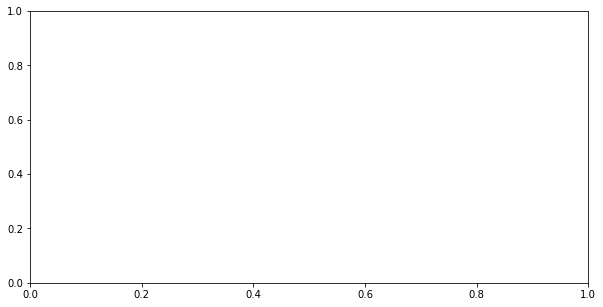

In [36]:

fig1, ax2 = plt.subplots(1,1, figsize=(10,5))
#fig2, ax2 = plt.subplots(1,1, figsize=(10,8))
trans = 0.8 # translucency

# cosine spacing
core_sizes = [0.3, 0.2, 0.1, 0.05, 0.02, 0.01][::-1]

for i, size in enumerate(core_sizes):

    t_start = time.time()
    L.core_size = size
    L.commit_parameters()
    #solve system

    L.solve_system()
    t_end = time.time()
    
    #plot results
    x1 = L.blades[0].R_dist/L.blades[0].R
    x2 = L.blades[0].R_cent/L.blades[0].R
#     ax1.plot(x1, L.blades[0].c_dist, label=str(N))
#     ax1.scatter(x1, L.blades[0].c_dist, s=25)
    ax2.plot(x2, L.blades[0].gamma_bound*L.N_blades/(U_0**2*np.pi/Omega), label=str(size))
#     ax2.scatter(x2, L.blades[0].gamma_bound*L.N_blades/(U_0**2*np.pi/Omega), s=25)

# # Make it pretty
# ax1.set_title('Geometry')
# ax1.grid(True)
# ax1.set_xlabel('r/R [-]')
# ax1.set_ylabel('chord [deg]')
# ax1.set_ylim(bottom=0)
# ax1.legend()

ax2.set_title('Circulation')
ax2.grid(True)
ax2.set_xlabel('r/R [-]')
ax2.set_ylabel('\u0393 [-]')
#ax2.set_ylim(bottom=0)
ax2.legend()

fig1.savefig('sensitivity_analysis/turb_sensitivity_core_size.eps')
# fig2.savefig('prop_img/prop_sensitivity_n_blade_sec_circulation.eps')


In [ ]:
p1 = figure(title="Circulation")
p1.grid.grid_line_alpha=0.1
p1.xaxis.axis_label = 'circ'
p1.yaxis.axis_label = 'r/R'
colors = ['blue', 'green', 'yellow', 'red', 'magenta', 'orange', 'purple']
output_notebook()
# cosine spacing
core_sizes = [0.5, 0.2, 0.1, 0.05, 0.02, 0.01][::-1]

for i, size in enumerate(core_sizes):

    t_start = time.time()
    L.core_size = size
    L.commit_parameters()
    #solve system

    L.solve_system()
    t_end = time.time()
    
    #plot results
    x1 = L.blades[0].R_dist/L.blades[0].R
    x2 = L.blades[0].R_cent/L.blades[0].R
#     ax1.plot(x1, L.blades[0].c_dist, label=str(N))
#     ax1.scatter(x1, L.blades[0].c_dist, s=25)
    p1.line(x2, L.blades[0].gamma_bound*L.N_blades/(U_0**2*np.pi/Omega), line_color=colors[i], legend_label=str(size))
#     ax2.scatter(x2, L.blades[0].gamma_bound*L.N_blades/(U_0**2*np.pi/Omega), s=25)

p1.legend.location = "top_left"
show(p1)

Loading BokehJS ...

Initializing
Setting up blade geometry
Constructing blade number 0
Constructing blade number 1
Constructing blade number 2
Setting up wake induction matrices
Evaluating the effect of the vorticity from blade 0 on blade 0


# Length of the wake (number of rotations)

In [ ]:

fig = plt.figure(figsize=(12,8))

single_line_plot = False

colors = ['b','r','g', 'y', 'k']
N_rotations = [100, 32, 16, 8, 4, 2, 1]
gs = GridSpec(2, len(N_rotations),height_ratios=[1, 2], figure=fig)
ax1 = fig.add_subplot(gs[1, :])

# 'Real' result
L.N_rot=100
t_start = time.time() 
L.commit_parameters()
L.solve_system()
t_end = time.time()
time_diff = round(t_end - t_start, 4)
print("For N_rot={}, execution time = {}s".format(L.N_rot, time_diff))

x = L.blades[0].R_cent/L.blades[0].R
ax1.plot(L.blades[0].R_cent/L.blades[0].R, -L.blades[0].cp_induction_u/U_0, label=str(L.N_rot), color='m')


for k, N in enumerate(N_rotations):
    # set parameters
    L.N_rot = N
    t_start = time.time() 
    L.commit_parameters()
    # plots wakes
    ax = fig.add_subplot(gs[0, k], projection='3d')
    for j in range(1):
        ax.plot(L.blades[j].x_cp,L.blades[j].y_cp,L.blades[j].z_cp, color=colors[k])
        for i in range(L.N_blade_sec+1):
            #print("j= {}, i={}".format(j,i))
            ax.plot(L.blades[j].x_wake[i,:],
                    L.blades[j].y_wake[i,:],
                    L.blades[j].z_wake[i,:], 
                    colors[k], linewidth=1)
    # solve system
    L.solve_system()
    t_end = time.time()
    time_diff = round(t_end - t_start, 4)
    print("For N_rot={}, execution time = {}s".format(N, time_diff))
    
    x = L.blades[0].R_cent/L.blades[0].R
    ax1.plot(L.blades[0].R_cent/L.blades[0].R, -L.blades[0].cp_induction_u/U_0, label=str(N), color=colors[k])
    #ax1.scatter(x, L.blades[0].gamma_bound*L.N_blades/(U_0**2*np.pi/Omega), s=25)
    
    print(L.blades[0].alpha)
    ax.view_init(30, -50-180)
    ax.set_ylabel('r/R [-]')
    ax.set_zlabel('r/R [-]')
    ax.set_xlabel('N [-]')
    ax.set_title('N rotations={}'.format(L.N_rot))


# Make it pretty
ax1.set_title('Induction factor')
ax1.grid(True)
ax1.set_xlabel('r/R [-]')
ax1.set_ylabel('a [-]')
ax1.set_ylim(bottom=0)
ax1.legend()
fig.savefig("sensitivity_analysis/turb_sensitivity_nrotations.eps")


# Singular rotor with impermeability boundary conditions

In [59]:
L.print_progress= False
L.solve_system_imper()

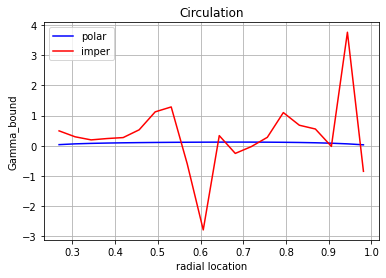

In [63]:
fig5 = plt.figure()
nd =(U_0**2*np.pi/(N_blades*Omega))
plt.plot(L.blades[0].R_cent/R,L.blades[0].gamma_bound/(U_0**2*np.pi/Omega), 'b', label ='polar')
plt.plot(L.blades[0].R_cent/R,L.blades[0].gamma_bound_imper/(U_0**2*np.pi/Omega), 'r', label ='imper')
plt.grid(True)
plt.xlabel('radial location')
plt.ylabel('Gamma_bound')
plt.legend()
plt.title('Circulation')
fig5.savefig('prop_img/prop_circulation_imper.png')

In [64]:
L.TSR = TSR
L.commit_parameters()
L.solve_system()
L.solve_system_imper()

Converged within iteration limit!
CT = 0.6103579157757032
CP = 0.41738526158968675


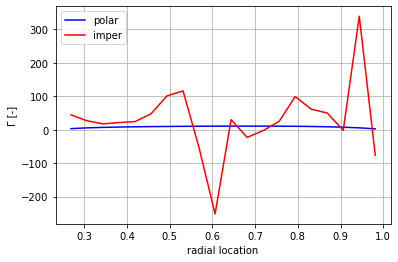

In [65]:
plt.figure()
plt.plot(L.blades[0].R_cent/R,L.blades[0].gamma_bound,'b', label ='polar')
plt.plot(L.blades[0].R_cent/R,L.blades[0].gamma_bound_imper,'r', label = 'imper')
plt.grid(True)
plt.xlabel('radial location')
plt.ylabel('\u0393 [-]')
plt.legend()

# Two rotors

In [7]:
#turbine parameters
R = 50
N_blades = 3
mu_start = 0.2
mu_end = 1
U_0 = 10

N_blade_sec = 20       #number of blade sections
N_wake_sec_rot = 30    #number of wake sections per rotation of the rotor
N_rot = 5              #the number of rotations of the rotor NOTE needs to be integer
a_w = 0.25             #the assumed wake convection induction factor U_wake = U_0*(1-a_w)
TSR = 10          

airfoil = 'DU_polar.txt' #DU_polar.txt or ARA_polar.txt

mu_vec = np.array([0.2,1.0])   #vector where chord and twist are known. NOTE beginpoint needs to be mu_start and end point mu_end
chord_vec = np.array([3.4,1])  #chord values at above locations in m
twist_vec = np.array([9.2,-2]) #twist values at above locations in degrees

spacing = 'cosine'  #spacing method to use, choose from 'cosine' or 'uniform'

#######new part
N_rotors = 2 #max is 2 currently
phase_diff = 0 #phase difference in radians, note max phase_diff = 2*pi/N_blades
location = [0,2*R]  #y-locations of the rotors

#intialize the class for two rotor case
L1 = lifting_line_model(R, N_blades, mu_start, mu_end, mu_vec, chord_vec, twist_vec, U_0, TSR, N_blade_sec, N_wake_sec_rot, N_rot, a_w, airfoil, spacing = spacing, N_rotors = N_rotors, phase_diff = phase_diff, location=location)
#change an attribute of the class, in this case the update weight, if you're happy with standard value, this line can be skipped
L1.weight_step = 0.05
L1.print_progress = False
#commit all the inputs
L1.commit_parameters()


L1.solve_system()

print(L1.blades[0].alpha)
print(L1.blades[1].alpha)
print(L1.blades[2].alpha)

#solve the single rotor case again for TSR=10 to compare
L.TSR = 10
L.print_progress = False
L.commit_parameters()
L.solve_system()


Converged within iteration limit!
CT = 0.7995277932825463
CP = 0.5058770503925304
[5.54370239 6.0140414  6.89878361 6.75881326 6.05705072 5.22863353
 4.52086614 4.01659014 3.72570372 3.62121345 3.67539044 3.85669391
 4.13232986 4.47299379 4.8300058  5.14713849 5.31338283 5.0971275
 4.2098539  3.0284196 ]
[5.32743959 5.79164848 6.66926576 6.54889804 5.87894828 5.08707504
 4.41173596 3.93595568 3.66605269 3.5781815  3.64529635 3.836573
 4.11952556 4.46575982 4.82636584 5.14550652 5.31255462 5.09638546
 4.20900713 3.02779491]
[5.3483942  5.81281254 6.69075558 6.56713312 5.89131276 5.09200285
 4.40909906 3.92654365 3.65065814 3.55771494 3.62063454 3.8085706
 4.08891513 4.43328364 4.79357401 5.11364056 5.28284023 5.07003905
 4.18730399 3.01205546]
Converged within iteration limit!
CT = 0.7895031322380199
CP = 0.49379087670577193


For the single rotor case CT = 0.7895031322380199 and the two rotor case CT = 0.7995277932825463
For the single rotor case CP = 0.49379087670577193 and the two rotor case CP = 0.5058770503925304


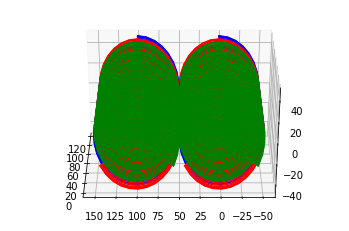

In [8]:
#plot the wake of the two rotor case
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.view_init(30, 180)

colors = ['b','r','g']

#plot the wake structure
for k in range(2):
    for j in range(N_blades):
        ax.plot(L1.blades[N_blades*k+j].x_cp,L1.blades[N_blades*k+j].y_cp,L1.blades[N_blades*k+j].z_cp)
        for i in range(N_blade_sec+1):
            ax.plot(L1.blades[N_blades*k+j].x_wake[i,:],L1.blades[N_blades*k+j].y_wake[i,:],L1.blades[N_blades*k+j].z_wake[i,:], colors[j])

#compare the results of the two rotor case with the one rotor case
print('For the single rotor case CT = {} and the two rotor case CT = {}'.format(L.CT_polar,L1.CT_polar))
print('For the single rotor case CP = {} and the two rotor case CP = {}'.format(L.CP_polar,L1.CP_polar))
